# Librerie
caricamento librerie

In [87]:
import pandas as pd

### Carica DataSet
games_march2025_cleaned

In [88]:
dataset = pd.read_csv("DataSet/games_march2025_cleaned.csv")

# Data Understanding

In [89]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89618 entries, 0 to 89617
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   appid                     89618 non-null  int64  
 1   name                      89618 non-null  object 
 2   release_date              89618 non-null  object 
 3   required_age              89618 non-null  int64  
 4   price                     89618 non-null  float64
 5   dlc_count                 89618 non-null  int64  
 6   detailed_description      89421 non-null  object 
 7   about_the_game            89398 non-null  object 
 8   short_description         89498 non-null  object 
 9   reviews                   10401 non-null  object 
 10  header_image              89618 non-null  object 
 11  website                   41114 non-null  object 
 12  support_url               44110 non-null  object 
 13  support_email             78798 non-null  object 
 14  window

score_rank troppi null 
metacritic_url non significativo



In [90]:
#statistiche del dataset
dataset.describe()

,appid,required_age,price,dlc_count,metacritic_score,achievements,recommendations,user_score,score_rank,positive,...,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,discount,peak_ccu,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent
count,8.961800e+04,89618.000000,89618.000000,89618.000000,89618.000000,89618.000000,8.961800e+04,89618.000000,39.000000,8.961800e+04,...,8.961800e+04,89618.000000,8.961800e+04,89618.000000,89618.000000,8.961800e+04,89618.000000,8.961800e+04,89618.000000,89618.000000
mean,1.656904e+06,0.183624,7.309623,0.595583,2.903245,20.552333,1.009401e+03,0.032817,99.128205,1.269896e+03,...,1.149119e+02,5.032694,1.147559e+02,5.301814,4.558627,9.833994e+01,45.352418,1.315490e+03,5.231639,15.584581
std,9.168390e+05,1.725594,13.331073,15.351920,14.445358,163.562418,2.204815e+04,1.615149,0.695076,3.181441e+04,...,6.814748e+03,181.100334,8.806711e+03,189.591095,16.538036,5.717544e+03,40.685695,3.542370e+04,22.335358,444.277307
min,2.000000e+01,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,98.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,-1.000000,-1.000000e+00,-1.000000,-1.000000
25%,8.550525e+05,0.000000,0.990000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,99.000000,1.000000e+00,...,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,-1.000000,-1.000000e+00,-1.000000,-1.000000
50%,1.524730e+06,0.000000,4.990000,0.000000,0.000000,5.000000,0.000000e+00,0.000000,99.000000,1.000000e+01,...,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,60.000000,1.500000e+01,-1.000000,-1.000000
75%,2.430852e+06,0.000000,9.990000,0.000000,0.000000,20.000000,0.000000e+00,0.000000,100.000000,5.800000e+01,...,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,84.000000,8.100000e+01,-1.000000,-1.000000
max,3.542350e+06,21.000000,999.980000,3427.000000,97.000000,9821.000000,4.401572e+06,100.000000,100.000000,7.480813e+06,...,1.462997e+06,18568.000000,1.462997e+06,18568.000000,100.000000,1.212356e+06,100.000000,8.632939e+06,100.000000,96473.000000


In [91]:
#dataset.describe(include=['O'])
dataset['user_score'].value_counts()
dataset['metacritic_score'].value_counts()
dataset['score_rank'].value_counts()
dataset['positive'].value_counts()

positive
0         19425
1          5297
2          4093
3          3372
4          2857
          ...  
2171          1
2013          1
999           1
2285          1
956144        1
Name: count, Length: 5087, dtype: int64

* Eliminiamo colonna 'appid', id interno al dataset di steam, non utile alla predizione
* Eliminiamo colonna della descrizione e raccomandazioni, sono testuali e non utili alla predizione.
    * 'detailed_description' , 'about_the_game', 'short_description', 'reviews'
* Eliminiamo url dell'immagine del gioco
    * 'header_image'
* Eliminiamo colonne testuali per supporto clienti e url vari
    * 'website', 'support_url', 'support_email', 'metacritic_url', 'notes'
* Eliminiamo colonne per trailer video e foto del gioco
    * 'movies' , 'screenshots'
* Elimino i punteggi che hanno troppi valori null
    * 'user_score', 'score_rank'
* Elimino le liste delle lingue supportate e dei pacchetti che non danno utilità
    * 'supported_languages', 'full_audio_languages', 'packages'
* Elimino numero di dlc e sconti che non danno informazioni o con molti valori nulli
    * 'discount', 'dlc_count', 'tags'
* Elimino dall’input tutte le variabili post-lancio
    * 'recommendations', 'average_playtime_forever', 'average_playtime_2weeks', 'median_playtime_2weeks', 'median_playtime_forever'
    * 'positive', 'negative'
    * 'peak_ccu', 'pct_pos_total', 'num_reviews_total', 'pct_pos_recent', 'num_reviews_recent
        * hanno varibile nulla => 800

In [92]:
# drop elimina colonna, per eliminare più colonne contemporaneamente [ , ]
#dataset.drop('appid', axis=1, inplace=True)
dataset.drop('name', axis=1, inplace=True)
dataset.drop(['detailed_description','about_the_game', 'short_description', 'reviews', 'header_image'], axis=1, inplace=True)
dataset.drop(['website', 'support_url', 'support_email', 'metacritic_url', 'notes'], axis=1, inplace=True)
dataset.drop(['screenshots','movies'], axis=1, inplace=True)
dataset.drop(['user_score', 'score_rank', 'metacritic_score'], axis=1, inplace=True)
dataset.drop(['supported_languages', 'full_audio_languages', 'packages', 'tags'], axis=1, inplace=True)
dataset.drop(['discount', 'dlc_count'], axis=1, inplace=True)
dataset.drop(['recommendations', 'average_playtime_forever', 'average_playtime_2weeks'], axis=1, inplace=True)
dataset.drop(['median_playtime_2weeks', 'median_playtime_forever'], axis=1, inplace=True)
dataset.drop(['positive', 'negative'], axis=1, inplace=True)
dataset.drop(['peak_ccu', 'pct_pos_total', 'num_reviews_total', 'pct_pos_recent', 'num_reviews_recent'], axis=1, inplace=True)

### Salvo su nuovo dataset da poter usare comodamente

In [93]:
# salvo dataset modificato in uno nuovo per poter ripartire da lì
dataset.to_csv('DataSet/games1.csv', index=False)

# ds
##### Salvo le modifiche in un nuovo dataset per poterlo utilizzare
* Inizializzare da QUI

In [94]:
#NUOVO DATASET CON MODIFICHE
ds = pd.read_csv("DataSet/games1.csv")

### Taglio dataset sugli ultimi 10 anni:
* taglio tutti i giochi usciti prima del 2015
    * dataset arriva fino al 2025

In [95]:
ds['release_date'] = pd.to_datetime(ds['release_date'], format='%Y-%m-%d', errors='coerce')

cutoff_date = pd.Timestamp('2015-01-01')

# Filtriamo solo le righe dal 2015 in poi
ds = ds[ds['release_date'] >= cutoff_date]

print(f"Righe rimanenti: {len(ds)}")


Righe rimanenti: 86847


## Variabile Target num giocatori che hanno acquistato il gioco
* per decretare successo del gioco

In [96]:
ds['estimated_owners'] = ds['estimated_owners'].apply(lambda x: x.split('-')[0])
ds['estimated_owners'].value_counts()

estimated_owners
0            67288
20000         9144
50000         4130
100000        2586
200000        2022
500000         833
1000000        441
2000000        263
5000000         78
10000000        34
20000000        18
50000000        10
Name: count, dtype: int64

### Raggruppamento
* Faccio raggruppamento
    * raggruppo per 4 valori quindi 4 intervalli

In [97]:
# dopo il taglio era diventato stringhe
ds['estimated_owners'] = pd.to_numeric(ds['estimated_owners'], errors='coerce')

intervalli = [0, 5000, 50000, 500000, float('inf')]
etichette = ['insuccesso', 'basso_successo', 'medio_successo', 'alto_successo']

ds['success_class'] = pd.cut(ds['estimated_owners'], bins=intervalli, labels=etichette, include_lowest=True)

# elimino colonna 'estimated_owners' non serve più - sostituita da 'success_class'
ds.drop('estimated_owners', axis=1, inplace=True)

print(ds['success_class'].value_counts())

success_class
insuccesso        67288
basso_successo    13274
medio_successo     5441
alto_successo       844
Name: count, dtype: int64


In [98]:
ds.to_csv('DataSet/games1.csv', index=False)

# Lettura da games1.csv

In [99]:
ds = pd.read_csv("DataSet/games1.csv", index_col=0)

## Analisi Frequenze
* Analizzo frequenze
    * categorie generi publishers developers

In [100]:
#print(dataset['genres'])
print(ds['genres'])

appid
578080     ['Action', 'Adventure', 'Massively Multiplayer...
271590                               ['Action', 'Adventure']
359550                                            ['Action']
252490     ['Action', 'Adventure', 'Indie', 'Massively Mu...
1172470              ['Action', 'Adventure', 'Free To Play']
                                 ...                        
2115110                            ['Indie', 'Early Access']
1174200         ['Action', 'Adventure', 'Indie', 'Strategy']
1160190                            ['Indie', 'Early Access']
3380340       ['Adventure', 'RPG', 'Simulation', 'Strategy']
763730                                   ['Action', 'Indie']
Name: genres, Length: 86847, dtype: object


## Analisi Generi
* analisi per pulizia 'genres'

appid
578080     ['Action', 'Adventure', 'Massively Multiplayer...
271590                               ['Action', 'Adventure']
359550                                            ['Action']
252490     ['Action', 'Adventure', 'Indie', 'Massively Mu...
1172470              ['Action', 'Adventure', 'Free To Play']
                                 ...                        
2115110                            ['Indie', 'Early Access']
1174200         ['Action', 'Adventure', 'Indie', 'Strategy']
1160190                            ['Indie', 'Early Access']
3380340       ['Adventure', 'RPG', 'Simulation', 'Strategy']
763730                                   ['Action', 'Indie']
Name: genres, Length: 86847, dtype: object

DISTRIBUZIONE VARIABILI


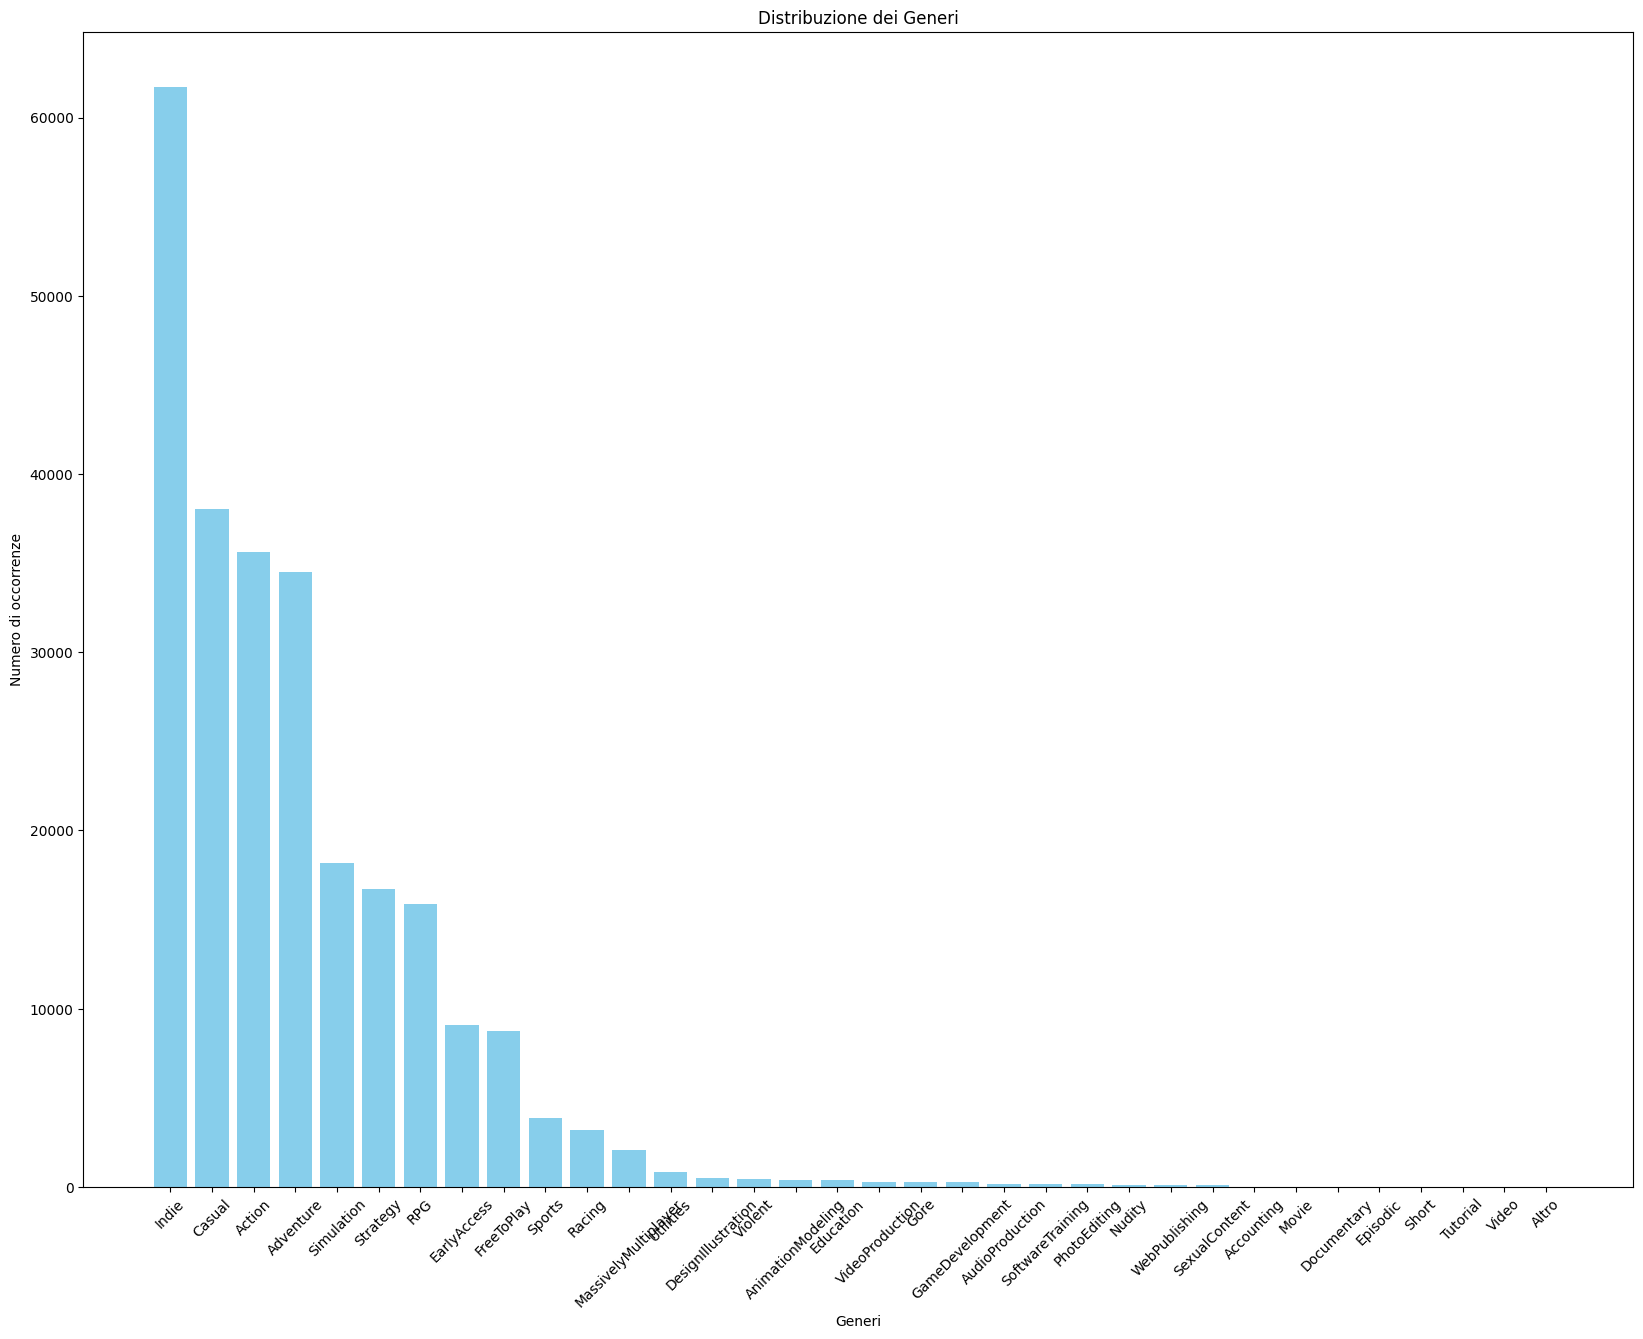


genres
Statistiche descrittive del genres:
count            86847
unique            2660
top       Casual Indie
freq              5047
Name: genres, dtype: object
appid
578080     Action Adventure MassivelyMultiplayer FreeToPlay
271590                                     Action Adventure
359550                                               Action
252490      Action Adventure Indie MassivelyMultiplayer RPG
1172470                         Action Adventure FreeToPlay
                                 ...                       
2115110                                   Indie EarlyAccess
1174200                     Action Adventure Indie Strategy
1160190                                   Indie EarlyAccess
3380340                   Adventure RPG Simulation Strategy
763730                                         Action Indie
Name: genres, Length: 86847, dtype: object


In [101]:
import re
import string
import matplotlib.pyplot as plt
from collections import Counter

def rimuovi_spazi(match):
    return match.group(0).replace(" ", "")

def clean_text(text):
    # Rimuovi gli spazi extra
    text = ' '.join(text.split())
    # Rimuovi la punteggiatura
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Rimuovi i numeri
    text = re.sub(r'\d+', '', text)
    # Rimuovi i caratteri speciali e simboli
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

def tagDistribution(all_genres_list, top_n=35):
    # Conta le ripetizioni di ogni tag
    genres_counts = Counter(all_genres_list)

    # Estrai i top N tag più comuni e i loro conteggi
    top_genres = genres_counts.most_common(top_n)
    other_count = sum(genres_counts.values()) - sum(count for genre, count in top_genres)

    # Seleziona i tag e i conteggi per il grafico
    genres = [genre for genre, count in top_genres] + ['Altro']
    counts = [count for tag, count in top_genres] + [other_count]

    # Crea il grafico a barre della distribuzione dei Generi
    plt.figure(figsize=(20, 15))
    plt.bar(genres, counts, color='skyblue')
    plt.xlabel('Generi')
    plt.ylabel('Numero di occorrenze')
    plt.title('Distribuzione dei Generi')
    plt.xticks(rotation=45)  # Ruota le etichette sull'asse x per una migliore leggibilità
    plt.show()

def frequenze_osservate_genres(ds):
    # Calcola le statistiche descrittive del genres
    genres_stats = ds['genres'].describe()

    # Stampa le statistiche descrittive del genres
    print("Statistiche descrittive del genres:")
    print(genres_stats)

print(ds['genres'])

# Applica la rimozione degli spazi a ogni riga della colonna 'genres'
ds['genres'] = ds['genres'].apply(lambda x: re.sub(r"'([^']*)'", rimuovi_spazi, x))
# Pulisce il dataset dei genres
ds['genres'] = ds['genres'].apply(clean_text)
# Estrai tutti i genres in un'unica stringa
all_genres_string = ds['genres'].str.cat(sep=' ')
# Dividi la stringa in una lista di singoli genres
all_genres_list = all_genres_string.split()

# Rimuove i duplicati convertendo la lista in un set e poi di nuovo in una lista
unique_genres = list(set(all_genres_list))
unique_genres.sort()

# Calcola la distribuzione dei Generi
print("\nDISTRIBUZIONE VARIABILI")
tagDistribution(all_genres_list)

print("\ngenres")
frequenze_osservate_genres(ds)

print(ds['genres'])

# così da cancellare le modifiche fatte per la sola lettura delle frequenze 
ds = pd.read_csv("DataSet/games1.csv", index_col=0)


# Feature engineering
## feature selection basata sulla frequenza globale dei generi
* Calcola frequenze per ogni genere 
* Ordina generi per ogni riga in base alla frequenza
    * sceglie i primi 2 generi più frequenti 
    * crea colonna 1 con genere più frequente e colonna 2 con il secondo genere più frequente

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
import itertools
from funzioni import parse_fromString_toList 

# Crea colonna genres ripulita
ds['genres_list'] = ds['genres'].apply(parse_fromString_toList)

# Frequenze globali dei generi
all_genres = list(itertools.chain.from_iterable(ds['genres_list']))
freq = Counter(all_genres)

# Per ogni riga: prendi i 2 generi con frequenza globale più alta
# tie-break: mantieni l'ordine originale della riga
def top_two_from_row(genres):
    if not genres:
        return pd.Series([np.nan, np.nan], index=['genre_top1','genre_top2'])
    # rimuove eventuali duplicati mantenendo l'ordine della riga
    uniq = list(dict.fromkeys(genres))
    pos = {g: i for i, g in enumerate(uniq)}
    # ordina per (frequenza globale, ordine nella riga)
    ordered = sorted(uniq, key=lambda g: (-freq.get(g, 0), pos[g]))
    if len(ordered) == 1:
        return pd.Series([ordered[0], np.nan], index=['genre_top1','genre_top2'])
    return pd.Series(ordered[:2], index=['genre_top1','genre_top2'])

ds[['genre_top1','genre_top2']] = ds['genres_list'].apply(top_two_from_row)

print(ds[['genres','genres_list','genre_top1','genre_top2']].head())


                                                    genres  \
appid                                                        
578080   ['Action', 'Adventure', 'Massively Multiplayer...   
271590                             ['Action', 'Adventure']   
359550                                          ['Action']   
252490   ['Action', 'Adventure', 'Indie', 'Massively Mu...   
1172470            ['Action', 'Adventure', 'Free To Play']   

                                               genres_list genre_top1  \
appid                                                                   
578080   [Action, Adventure, Massively Multiplayer, Fre...     Action   
271590                                 [Action, Adventure]     Action   
359550                                            [Action]     Action   
252490   [Action, Adventure, Indie, Massively Multiplay...      Indie   
1172470                  [Action, Adventure, Free To Play]     Action   

        genre_top2  
appid               
578080   Ad

In [103]:
ds.to_csv('DataSet/games1.csv')

## feature selection di platform
* unificare windows/mac/linux facendone la somma e salvando in un'unica variabile 'platform_count'

In [104]:
ds['platform_count'] = ds[['windows', 'mac', 'linux']].sum(axis=1).astype(int)

ds.drop(['windows', 'mac', 'linux'], axis=1, inplace=True)

ds['platform_count'].value_counts()

platform_count
1    67353
2    10838
3     8656
Name: count, dtype: int64

## Normalizzazione
normalizzazione logaritma del prezzo 'price'

In [ ]:
# Flag che indica se il gioco è gratuito
ds['is_free'] = (ds['price'] == 0).astype(int)

# Trasformazione logaritmica del prezzo (aggiunge 1 per evitare log(0))
ds['price_log'] = np.log1p(ds['price'])

print(ds['price_log'].value_counts())
#print(ds['price'].value_counts())

ds.drop('price', axis=1, inplace=True)

price_log
0.000000    13915
1.790091     9291
0.688135     8295
2.396986     7487
1.095273     6206
            ...  
3.978934        1
2.760010        1
2.034706        1
2.769459        1
2.867331        1
Name: count, Length: 611, dtype: int64


## Elimino righe che hanno: free to play e insuccesso 

Siccome ho notato nell'analisi dei dati che 67288 giochi sono stati acquistati da 0 persone e lo stesso numero equivale alla classe 'insuccesso', ho pensato che in questi dati possano essere compresi anche i giochi free to play.
Infatti eliminino tutte le righe che sono free to play e non hanno successo.

insuccesso : 67288 

0 : 67288

In [106]:
ds.drop(
    ds[(ds['is_free'] == 0) & (ds['success_class'] == 'insuccesso')].index,
    inplace=True
)

print(ds['success_class'].value_counts())


success_class
basso_successo    13274
insuccesso        10733
medio_successo     5441
alto_successo       844
Name: count, dtype: int64


## Feature selection
* Non serve tutta la data, ma il periodo dell'anno (trimestre di rilascio) in cui è stato pubblicato. 
* estraggo mese e poi trimestre di appartenenza

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

ds['release_date'] = pd.to_datetime(ds['release_date'])
ds['month'] = ds['release_date'].dt.month

# Mappo i mesi in 4 trimestri
def trimestre(month):
    if month in [12, 1, 2]:
        return 4 # inverno
    elif month in [3, 4, 5]:
        return 1 # primavera
    elif month in [6, 7, 8]:
        return 2 # estate
    else:
        return 3 # autunno

ds['trimester'] = ds['month'].apply(trimestre)

print(ds['trimester'].value_counts())

trimester
3    8066
1    7642
2    7325
4    7259
Name: count, dtype: int64


In [108]:
ds.drop('month', axis=1, inplace=True)
ds.drop('release_date', axis=1, inplace=True)

In [109]:
ds.to_csv("DataSet/games1.csv")

In [110]:
ds = pd.read_csv("DataSet/games1.csv", index_col=0)

In [111]:
print(ds.columns.tolist())

['required_age', 'achievements', 'developers', 'publishers', 'categories', 'genres', 'success_class', 'genres_list', 'genre_top1', 'genre_top2', 'platform_count', 'is_free', 'price_log', 'trimester']


# Encoding delle variabili
## Encoding success_class
* Encoding variabile target success_class
'insuccesso'=0
'basso_successo' =1
'medio_successo' =2
'alto_successo'= 3

In [112]:
from sklearn.preprocessing import LabelEncoder

mapping = {
    'insuccesso': 0,
    'basso_successo': 1,
    'medio_successo': 2,
    'alto_successo': 3
}

ds['success_class_encoded'] = ds['success_class'].map(mapping)

# 'success_class_encoded' è la y da usare in train/test
y = ds['success_class_encoded']

In [113]:
ds.drop('success_class', axis=1, inplace=True)

print(ds['success_class_encoded'].value_counts())

success_class_encoded
1    13274
0    10733
2     5441
3      844
Name: count, dtype: int64


## Encoding per genres
* Encoding per frequenza

In [ ]:
from funzioni import parse_fromString_toList 

# Crea colonna genres ripulita (da stringa a lista) con parse_fromString_toList
ds['genres_list'] = ds['genres'].apply(parse_fromString_toList)

# Conta la frequenza di tutti i generi
all_genres = list(itertools.chain.from_iterable(ds['genres_list']))
freq_map_genre = Counter(all_genres)

# Aggiunge encoding numerico basato sulle frequenze
ds['top1_genre_freq'] = ds['genre_top1'].map(freq_map_genre).fillna(0)
ds['top2_genre_freq'] = ds['genre_top2'].map(freq_map_genre).fillna(0)

* Salvo in un file i dizionari per genre appena creati, per poterli usare nella demo o eseguibile

In [115]:
import joblib

joblib.dump(freq_map_genre, "map/freq_map_genre.pkl")

['map/freq_map_genre.pkl']

* One hot encoding per top generi più frequenti

In [ ]:
# all_genres è lista ripulita i generi come elementi di una lista
# (creato precedentemente per conteggio frequenze)
genre_counts = Counter(all_genres)

# Prendo i 12 generi più frequenti
top_genres = [g for g, _ in genre_counts.most_common(12)]
print("Top 12 generi:", top_genres)

# Multi-hot encoding solo per i top generi
for g in top_genres:
    ds[f"genre_{g}"] = ds['genres_list'].apply(lambda x: int(g in x))

print(ds[[f"genre_{g}" for g in top_genres]].head())

Top 12 generi: ['Indie', 'Action', 'Adventure', 'Casual', 'Free To Play', 'RPG', 'Strategy', 'Simulation', 'Early Access', 'Massively Multiplayer', 'Sports', 'Racing']
         genre_Indie  genre_Action  genre_Adventure  genre_Casual  \
appid                                                               
578080             0             1                1             0   
271590             0             1                1             0   
359550             0             1                0             0   
252490             1             1                1             0   
1172470            0             1                1             0   

         genre_Free To Play  genre_RPG  genre_Strategy  genre_Simulation  \
appid                                                                      
578080                    1          0               0                 0   
271590                    0          0               0                 0   
359550                    0          0      

In [117]:
ds.drop(['genre_top1', 'genre_top2'], axis=1, inplace=True)
ds.drop(['genres', 'genres_list'], axis=1, inplace=True)
print(ds.columns.tolist())

['required_age', 'achievements', 'developers', 'publishers', 'categories', 'platform_count', 'is_free', 'price_log', 'trimester', 'success_class_encoded', 'top1_genre_freq', 'top2_genre_freq', 'genre_Indie', 'genre_Action', 'genre_Adventure', 'genre_Casual', 'genre_Free To Play', 'genre_RPG', 'genre_Strategy', 'genre_Simulation', 'genre_Early Access', 'genre_Massively Multiplayer', 'genre_Sports', 'genre_Racing']


In [118]:
ds.to_csv('DataSet/games1.csv', index=False)

## Encoding di categories
* Ci sono colonne che contengono liste di variabili, queste sono prestabilite sono una ventina. Procedo con multi-hot encoding e le divido in più colonne.

In [119]:
import ast
from sklearn.preprocessing import MultiLabelBinarizer

# parsing (se è stringa con [])
ds['categories_list'] = ds['categories'].apply(lambda x: ast.literal_eval(x) if isinstance(x,str) else x)

mlb = MultiLabelBinarizer()
cat_encoded = mlb.fit_transform(ds['categories_list'])

cat_df = pd.DataFrame(cat_encoded, columns=[f"cat_{c}" for c in mlb.classes_], index=ds.index)

# aggiungo al dataset
ds = pd.concat([ds, cat_df], axis=1)

ds.drop(columns=['categories','categories_list'], inplace=True)

#### Elimino le categorie meno utilizzate


In [120]:
# eliminare dalla colonna x alla colonna y (consecutive)
ds.drop(columns=ds.loc[:, "cat_Steam Turn Notifications":"cat_Valve Anti-Cheat enabled"].columns, inplace=True)
ds.drop(columns=ds.loc[:, "cat_Stats":"cat_Steam Timeline"].columns, inplace=True)
ds.drop(columns=ds.loc[:, "cat_Remote Play Together":"cat_Remote Play on Tablet"].columns, inplace=True)
ds.drop(['cat_HDR available', 'cat_Partial Controller Support', 'cat_Commentary available'], axis=1, inplace=True)

print(ds.columns.tolist())

['required_age', 'achievements', 'developers', 'publishers', 'platform_count', 'is_free', 'price_log', 'trimester', 'success_class_encoded', 'top1_genre_freq', 'top2_genre_freq', 'genre_Indie', 'genre_Action', 'genre_Adventure', 'genre_Casual', 'genre_Free To Play', 'genre_RPG', 'genre_Strategy', 'genre_Simulation', 'genre_Early Access', 'genre_Massively Multiplayer', 'genre_Sports', 'genre_Racing', 'cat_Captions available', 'cat_Co-op', 'cat_Cross-Platform Multiplayer', 'cat_Family Sharing', 'cat_Full controller support', 'cat_In-App Purchases', 'cat_Includes Source SDK', 'cat_Includes level editor', 'cat_LAN Co-op', 'cat_LAN PvP', 'cat_MMO', 'cat_Multi-player', 'cat_Online Co-op', 'cat_Online PvP', 'cat_PvP', 'cat_Shared/Split Screen', 'cat_Shared/Split Screen Co-op', 'cat_Shared/Split Screen PvP', 'cat_Single-player', 'cat_Steam Trading Cards']


## Encoding publisher
* Prendo primo publisher per importanza.


In [121]:
from funzioni import estrai_primo

ds['publishers_main'] = ds['publishers'].apply(estrai_primo)

freq_map_pub = ds['publishers_main'].value_counts().to_dict()
ds['publishers_freq'] = ds['publishers_main'].map(freq_map_pub).fillna(0)

## Encoding Developer
* Prendo primo developer per importanza.


In [122]:
from funzioni import estrai_primo

ds['developers_main'] = ds['developers'].apply(estrai_primo)

freq_map_dev = ds['developers_main'].value_counts().to_dict()
ds['developer_freq'] = ds['developers_main'].map(freq_map_dev).fillna(0)

* Salvo in un file i dizionari appena creati, per poterli usare nella demo o eseguibile

In [123]:
import joblib

# FutureGame/addestramentoModello/map/
joblib.dump(freq_map_pub, "map/freq_map_pub.pkl")
joblib.dump(freq_map_dev, "map/freq_map_dev.pkl")

['map/freq_map_dev.pkl']

### Encoding Developers e publishers per frequenze e valori comuni
* frequency encoding
* one-hot dei top valori più comuni

In [124]:
# Top 20 publishers
top_pub = ds['publishers_main'].value_counts().nlargest(20).index
ds['pub_top'] = ds['publishers_main'].where(ds['publishers_main'].isin(top_pub), 'other')

# Top 20 developers
top_dev = ds['developers_main'].value_counts().nlargest(20).index
ds['dev_top'] = ds['developers_main'].where(ds['developers_main'].isin(top_dev), 'other')

# One-hot encoding
ds = pd.get_dummies(ds, columns=['pub_top', 'dev_top'], drop_first=True)


In [125]:
ds.drop(columns=['publishers','publishers_main', 'developers', 'developers_main'], inplace=True)

In [126]:
ds.to_csv('DataSet/games1.csv', index=False)

In [127]:
print(ds.columns.tolist())

['required_age', 'achievements', 'platform_count', 'is_free', 'price_log', 'trimester', 'success_class_encoded', 'top1_genre_freq', 'top2_genre_freq', 'genre_Indie', 'genre_Action', 'genre_Adventure', 'genre_Casual', 'genre_Free To Play', 'genre_RPG', 'genre_Strategy', 'genre_Simulation', 'genre_Early Access', 'genre_Massively Multiplayer', 'genre_Sports', 'genre_Racing', 'cat_Captions available', 'cat_Co-op', 'cat_Cross-Platform Multiplayer', 'cat_Family Sharing', 'cat_Full controller support', 'cat_In-App Purchases', 'cat_Includes Source SDK', 'cat_Includes level editor', 'cat_LAN Co-op', 'cat_LAN PvP', 'cat_MMO', 'cat_Multi-player', 'cat_Online Co-op', 'cat_Online PvP', 'cat_PvP', 'cat_Shared/Split Screen', 'cat_Shared/Split Screen Co-op', 'cat_Shared/Split Screen PvP', 'cat_Single-player', 'cat_Steam Trading Cards', 'publishers_freq', 'developer_freq', 'pub_top_Big Fish Games', 'pub_top_Conglomerate 5', 'pub_top_Daedalic Entertainment', 'pub_top_Devolver Digital', 'pub_top_DigiPen 

In [128]:
ds = pd.read_csv("DataSet/games1.csv", index_col=0)